In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# load shapes image and convert color

shp = cv2.imread("data/images/Image.png")
shp_gry = cv2.cvtColor(shp,cv2.COLOR_BGR2GRAY)

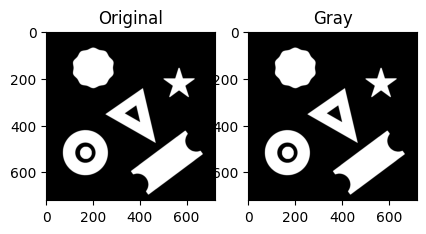

In [3]:
# display original, gray

plt.figure(figsize=(10,3))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shp)

plt.subplot(1,4,2)
plt.title("Gray")
plt.imshow(shp_gry, cmap='gray')

plt.show()

In [4]:
# find contours from gray image

contours_shp, hierarchy = cv2.findContours(shp_gry,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

contours_shp = sorted(contours_shp, key=cv2.contourArea, reverse=True)

contour3 = contours_shp[2]

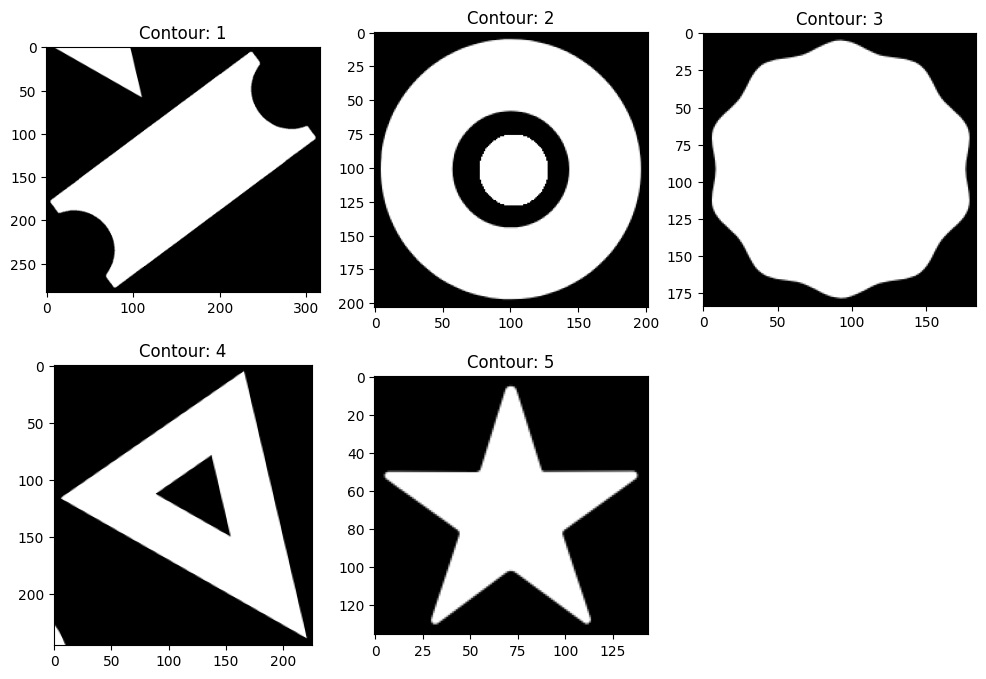

In [10]:
# crop into smaller images by contour

plt.figure(figsize=(12,8))

shp_crp = []

for idx,con in enumerate(contours_shp):
    x,y,w,h = cv2.boundingRect(con)
    crp = shp_gry[y-5:y+h+5,x-5:x+w+5]
    shp_crp.append(crp)
    plt.subplot(2,3,idx+1)
    plt.title(f"Contour: {idx+1}")
    plt.imshow(crp, cmap="gray")

plt.show()

In [16]:
star = shp_crp[-1]
sw, sh = star.shape
str1 = cv2.matchTemplate(shp_gry, star, cv2.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(str1)
bottom_right = (max_loc[0]+sh, max_loc[1]+sw)

shp_dtc = shp_gry.copy()
cv2.rectangle(shp_dtc, max_loc, bottom_right, (255,255,255), 5)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

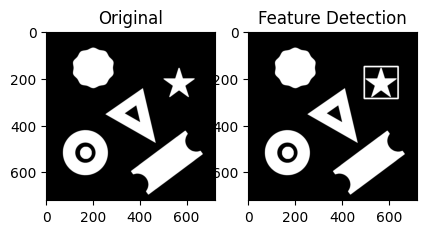

In [17]:
# display original, gray

plt.figure(figsize=(10,3))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shp)

plt.subplot(1,4,2)
plt.title("Feature Detection")
plt.imshow(shp_dtc, cmap='gray')

plt.show()